In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

Part-1
=

Introduction
--

If we have:
1. $x(t) = e^{t}u(t)$
2. $h(t) = u(t+1) - u(t-1)$

then we should calculate and plot these fourier transform signals:
1. $|X(\omega)|$
2. $|H(\omega)|$
3. $|Y_{1}(\omega)| = |X(\omega)H(\omega)|$

### Calculation

#### Step-1) $|X(\omega)|$

$X(\omega) = \mathcal{F}\{e^{-t}u(t)\} = \int_{0}^{\infty} e^{-t} e^{-j\omega t} dt = \int_{0}^{\infty} e^{-(1+j\omega)t} dt = \frac{1}{1+j\omega}$

#### Step-2) $|H(\omega)|$

$H(\omega) = \left( \frac{e^{-j\omega}}{j\omega} + \pi\delta(\omega) \right) - \left( \frac{e^{j\omega}}{j\omega} + \pi\delta(\omega) \right) = \frac{e^{-j\omega} - e^{j\omega}}{j\omega} = \frac{-2j\sin(\omega)}{j\omega} = \frac{2\sin(\omega)}{\omega}$

#### Step-3) $|Y_{1}(\omega)| = |X(\omega)H(\omega)|$

$|Y_{1}(\omega)| = \left|\frac{2\sin(\omega)}{\omega(1+j\omega)}\right| = \frac{2|\sin(\omega)|}{\omega|1+j\omega|} = \frac{2|\sin(\omega)|}{\omega\sqrt{1+\omega^2}}$

### Plot

#### $|X(\omega)|$

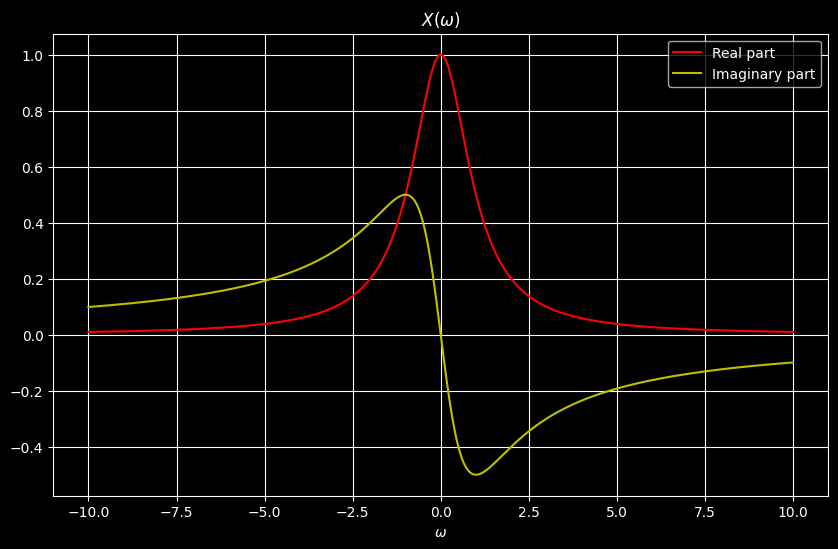

In [8]:
# Define omega range
omega = np.linspace(-10, 10, 1000)

# Compute X(omega)
X_omega = 1 / (1 + 1j * omega)

# Plot real and imaginary parts of X(omega)
plt.figure(figsize=(10, 6))
plt.plot(omega, X_omega.real, color='r', label='Real part')
plt.plot(omega, X_omega.imag, color='y', label='Imaginary part')
plt.title(r'$X(\omega)$')
plt.xlabel(r'$\omega$')
plt.legend()
plt.style.use('dark_background')
plt.grid(True)
plt.show()

#### $|H(\omega)|$

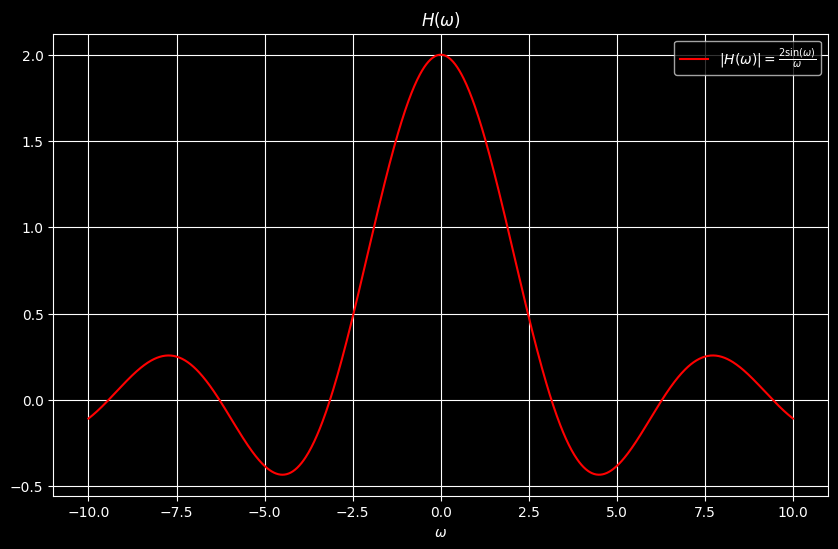

In [19]:
# Define omega range
omega = np.linspace(-10, 10, 1000)

# Compute H(omega)
H_omega = 2 * np.sin(omega) / omega

# Handle division by zero at omega = 0
H_omega[omega == 0] = 2

# Plot H(omega)
plt.figure(figsize=(10, 6))
plt.plot(omega, H_omega, color='r', label=r'$|H(\omega)| = \frac{2\sin(\omega)}{\omega}$')
plt.title(r'$H(\omega)$')
plt.xlabel(r'$\omega$')
plt.legend()
plt.style.use('dark_background')
plt.grid(True)
plt.show()

#### $|Y_{1}(\omega)| = |X(\omega)H(\omega)|$

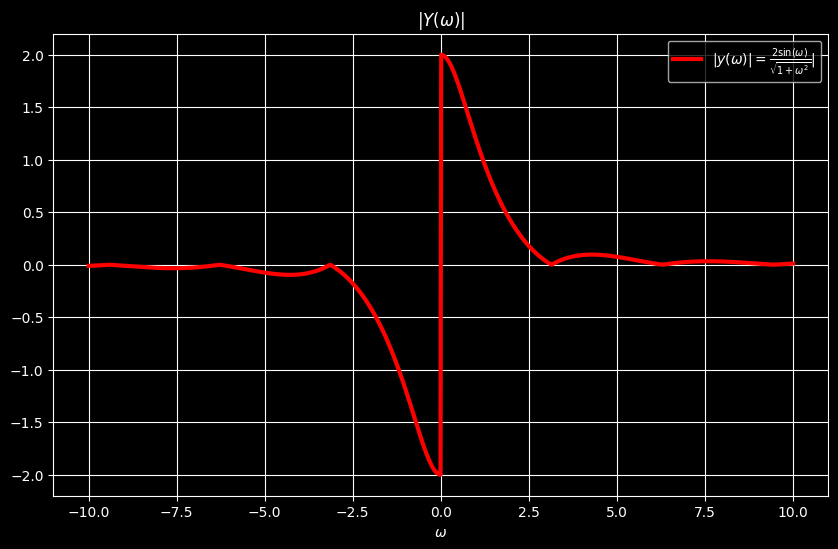

In [28]:
# Define omega range
omega = np.linspace(-10, 10, 1000)

# Compute |Y(omega)|
Y_omega = 2 * np.abs(np.sin(omega)) / (omega * np.sqrt(1 + omega**2))

# Handle division by zero at omega = 0
Y_omega[omega == 0] = 2 / np.sqrt(1 + omega[omega == 0]**2)

# Plot |Y(omega)|
plt.figure(figsize=(10, 6))
plt.plot(omega, Y_omega, color='r', label=r'$|y(\omega)| = \frac{2\sin(\omega)}{\sqrt{1 + \omega^2}}|$', linewidth=3)
plt.title(r'$|Y(\omega)|$')
plt.xlabel(r'$\omega$')
plt.legend()
plt.style.use('dark_background')
plt.grid(True)
plt.show()


Part-2
=

Introduction
--

If $x_{2}(t) = 2x(t-2)$ then calculate $y_{2}(t)$ and $|Y_{2}(\omega)|$

for this part we use convolve function from scipy package to calculate convulsions between X and H.

Plot
--

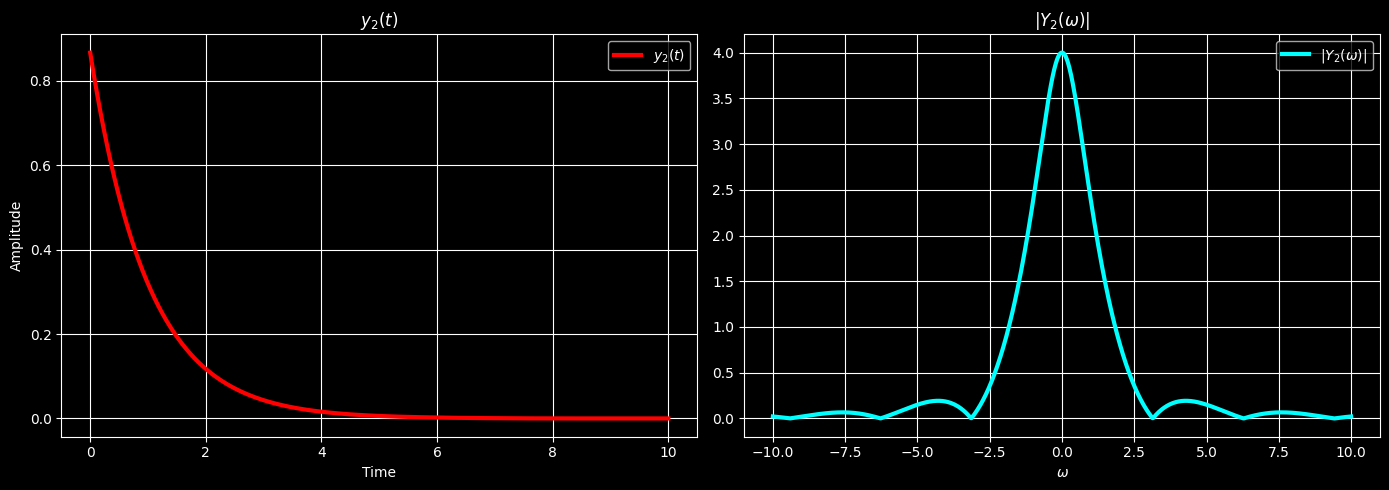

In [27]:
# Define time range
t = np.linspace(0, 10, 1000)

# Define x(t) = e^-t * u(t)
x_t_shifted = np.exp(-(t-2)) * (t >= 2)  # Shifted version of x(t)

# Define h(t-2)
h_t_shifted = (np.abs(t - 2) <= 1).astype(int)  # Rectangular pulse centered at t=2 with width 2

# Compute y2(t) = 2x(t-2) * h(t-2)
y2_t = 2 * convolve(x_t_shifted, h_t_shifted, mode='same') / np.sum(h_t_shifted)  # Normalize by the sum of h(t-2)

# Compute Fourier transforms
omega = np.linspace(-10, 10, 1000)
X2_omega = 2 * (1 / (1 + 1j * omega)) * np.exp(-1j * omega * 2)  # X2(omega)
H_omega = 2 * np.sin(omega) / omega  # H(omega)

# Compute Y2(omega) = X2(omega) * H(omega)
Y2_omega = X2_omega * H_omega

# Compute |Y2(omega)|
mag_Y2_omega = np.abs(Y2_omega)

# Plot y2(t)
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(t, y2_t, label='$y_2(t)$', color='r', linewidth=3)
plt.title('$y_2(t)$')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Plot |Y2(omega)|
plt.subplot(1, 2, 2)
plt.plot(omega, mag_Y2_omega, label='$|Y_2(\omega)|$', color='aqua', linewidth=3)
plt.title('$|Y_2(\omega)|$')
plt.xlabel('$\omega$')
plt.grid(True)
plt.legend()

plt.tight_layout()